# Data Mining project

Made by ; Meradji Anais ( groupe 2 ) et Gacem Aicha ( groupe 4 )

Nous avons devant nous un dataset qui contient les compositions chimiques  de plus de 700 alliages métalliques, accompagnées de leurs propriétés thermiques telles que Tg, Tx, Tl et Dmax.

**First step**: nous allons réorganiser le dataset, à l'aide d'une expression reguliere nous allons faire en sorte de constituer une colonne pour chaque element chimique.

In [2]:
#Faisons les import necessaires

import pandas as pd
import re

# Nous allons charger notre dataset et supprimer les colonnes vides ( car il y'en a pas mal)
df = pd.read_excel("BMGs-2024_data.xlsx").dropna(axis=1, how='all')


composition_col = df.columns[0] #Nous chargons la colonne de composition Alloys ( composition )
#it's the first one


# extraction des elments et leurs pourcentages


#pattern = r'([A-Z][a-z]*)(\s?[0-9]*\.?[0-9]+)'

pattern = r'([A-Z][a-z]*)(\s?[0-9]*\.?[0-9]+)' #prend en compte le cas ou il y'a un espace entre un element et son pourcentage
#le cas ou il y'a des parentheses..

#expression reguliere ( regular expression)

 #on mets les valeurs extraites dans un dictionnaire
extracted = [
    {el: float(val) for el, val in re.findall(pattern, str(comp))}
    for comp in df[composition_col]
]

df_elements = pd.DataFrame(extracted).fillna(0)

df_final = pd.concat([df_elements, df.drop(columns=[composition_col]).reset_index(drop=True)], axis=1) #concatenation des colonnes des elements
# + les colonnes que l'on avait déjà


Testons notre expression reguliere!

In [3]:
pattern = r'([A-Z][a-z]*)(\s?[0-9]*\.?[0-9]+)'

test_string = "(Ti 0.45 Cu0.378 Zr0.10 Ni0.072)98 Sn2"

matches = re.findall(pattern, test_string)
print(matches)

[('Ti', ' 0.45'), ('Cu', '0.378'), ('Zr', '0.10'), ('Ni', '0.072'), ('Sn', '2')]


In [4]:
test_string = "Ti 33.36 Cu40.88 Ni9.76 Zr 7.6Hf8.4"

pattern = r'([A-Z][a-z]*)(\s?[0-9]*\.?[0-9]+)'

matches = re.findall(pattern, test_string)
print(matches)

[('Ti', ' 33.36'), ('Cu', '40.88'), ('Ni', '9.76'), ('Zr', ' 7.6'), ('Hf', '8.4')]


Notre ER fonctionne bien. Nous avons egalement vérifié avec le dataset.

In [5]:
valeur = df_final.iloc[699]
valeur_non_zero = valeur[valeur != 0]
print(valeur_non_zero)

Cu             40.88
Ni              9.76
Zr              7.60
Ti             33.36
Hf              8.40
Tg(K)         679.00
Tx(K)         716.00
Tl(K)        1188.00
Dmax (mm)       2.00
Name: 699, dtype: float64


La derniere ligne du dataset est correcte. Nous avons également vérifié d'autres lignes aleatoires, tout est bon, notre expression reguliere arrive a extraire les éléments correctement.

Voyons voir le résultat

In [6]:
print("Nombre d'éléments extraits :", len(df_elements.columns))
print("Éléments extraits :", list(df_elements.columns))

Nombre d'éléments extraits : 45
Éléments extraits : ['Ag', 'Ca', 'Mg', 'Cu', 'Au', 'Si', 'Pd', 'Nd', 'Al', 'Ni', 'Fe', 'Zn', 'Ce', 'Ga', 'Nb', 'La', 'Co', 'B', 'Ta', 'Cr', 'C', 'Mo', 'Zr', 'Ti', 'Hf', 'In', 'Y', 'Sn', 'P', 'W', 'Er', 'Mn', 'L', 'Dy', 'Tb', 'Gd', 'Tm', 'Ho', 'Pr', 'S', 'Be', 'Sc', 'Sm', 'V', 'Mm']


Nous avons pu extraite 45 elements chimique. Dont deux non valides ( probablement une erreur de frappe) , retirons les.

In [7]:
data = df_final.drop(columns=['L', 'Mm'], errors='ignore')

In [8]:
print(data.columns)

Index(['Ag', 'Ca', 'Mg', 'Cu', 'Au', 'Si', 'Pd', 'Nd', 'Al', 'Ni', 'Fe', 'Zn',
       'Ce', 'Ga', 'Nb', 'La', 'Co', 'B', 'Ta', 'Cr', 'C', 'Mo', 'Zr', 'Ti',
       'Hf', 'In', 'Y', 'Sn', 'P', 'W', 'Er', 'Mn', 'Dy', 'Tb', 'Gd', 'Tm',
       'Ho', 'Pr', 'S', 'Be', 'Sc', 'Sm', 'V', 'Tg(K)', 'Tx(K)', 'Tl(K)',
       'Dmax (mm)'],
      dtype='object')


Okay, notre dataset est organisé maintenant. Ca ne veut cependant pas dire qu'il est pret a etre utilisé, explorons le puis détectons les soucis qu'il peut y avoir avant de passer au data preprocessing.

**Exploration du dataset**

In [9]:
print(data.head())

     Ag    Ca    Mg    Cu   Au   Si   Pd   Nd   Al   Ni  ...   Pr    S   Be  \
0  30.8  30.8  23.1  15.4  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  38.4  30.8  30.8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  38.5  30.8  23.0   7.7  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  38.5  15.4  38.5   7.7  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4  46.2  30.7  23.1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    Sc   Sm    V  Tg(K)  Tx(K)  Tl(K)  Dmax (mm)  
0  0.0  0.0  0.0  413.0  432.0  803.0        2.5  
1  0.0  0.0  0.0  394.0  426.0  805.0        0.5  
2  0.0  0.0  0.0  384.0  416.0  854.0        2.0  
3  0.0  0.0  0.0  405.0  436.0  842.0        0.5  
4  0.0  0.0  0.0  399.0  426.0  765.0        0.7  

[5 rows x 47 columns]


In [10]:
print(data.shape)

(700, 47)


In [11]:
print("Colonnes du dataset :")
print(data.columns.tolist())

Colonnes du dataset :
['Ag', 'Ca', 'Mg', 'Cu', 'Au', 'Si', 'Pd', 'Nd', 'Al', 'Ni', 'Fe', 'Zn', 'Ce', 'Ga', 'Nb', 'La', 'Co', 'B', 'Ta', 'Cr', 'C', 'Mo', 'Zr', 'Ti', 'Hf', 'In', 'Y', 'Sn', 'P', 'W', 'Er', 'Mn', 'Dy', 'Tb', 'Gd', 'Tm', 'Ho', 'Pr', 'S', 'Be', 'Sc', 'Sm', 'V', 'Tg(K)', 'Tx(K)', 'Tl(K)', 'Dmax (mm)']


In [12]:
data.describe()

,Ag,Ca,Mg,Cu,Au,Si,Pd,Nd,Al,Ni,...,Pr,S,Be,Sc,Sm,V,Tg(K),Tx(K),Tl(K),Dmax (mm)
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,...,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,698.000000,698.000000,698.000000,698.000000
mean,2.716229,6.992286,9.617429,17.008689,0.585714,1.243100,1.608143,0.288857,3.883571,5.268997,...,0.317143,0.150000,0.180714,0.057143,0.014286,0.000714,613.895272,664.923496,1065.123926,5.217335
std,8.498819,17.580566,20.109278,19.514659,5.385279,3.656551,10.260075,3.406065,6.299145,13.084821,...,4.635744,1.983209,1.718114,1.068280,0.377964,0.018898,180.310117,187.912993,278.376667,5.979328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,341.000000,377.000000,630.000000,0.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,419.250000,470.000000,773.250000,2.000000
50%,0.000000,0.000000,0.000000,7.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,670.500000,731.000000,1145.000000,3.000000
75%,0.000000,0.000000,3.675000,34.250000,0.000000,0.000000,0.000000,0.000000,8.000000,0.072000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,747.000000,799.750000,1274.500000,6.000000
max,61.500000,70.000000,90.000000,83.000000,55.000000,30.000000,81.500000,61.000000,33.600000,90.000000,...,72.000000,28.000000,24.000000,20.000000,10.000000,0.500000,959.000000,1019.000000,1559.000000,72.000000


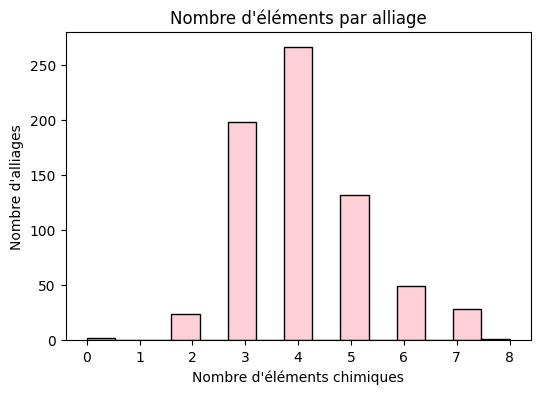

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


element_columns = data.columns[:43]
data['Nb_Elements'] = (data[element_columns] > 0).sum(axis=1)

plt.figure(figsize=(6, 4))
sns.histplot(data['Nb_Elements'], bins=15, kde=False, color='pink')
plt.title('Nombre d\'éléments par alliage')
plt.xlabel('Nombre d\'éléments chimiques')
plt.ylabel('Nombre d\'alliages')
plt.show()


In [14]:
data=data.drop(columns=['Nb_Elements'])

Observation: la plupart des alliages sont composés de 4 elements chimiques.

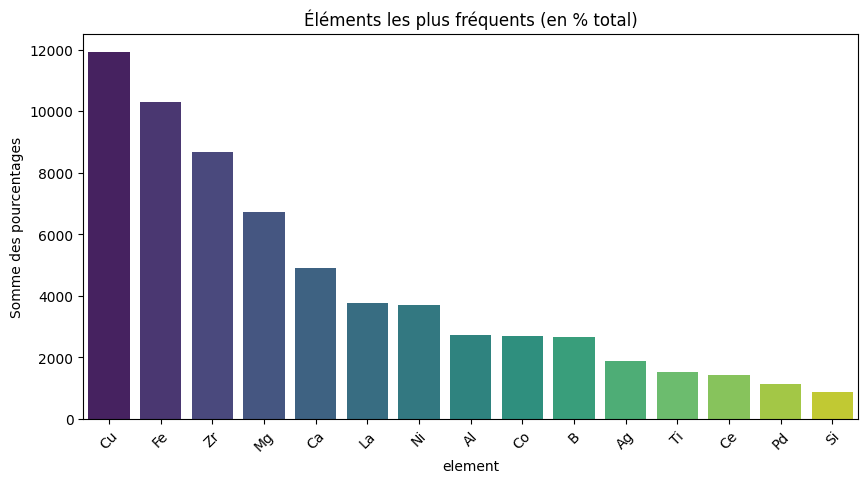

In [15]:
#Somme des pourcentages par élément
element_totals = data[element_columns].sum().sort_values(ascending=False)

# Affichage des 15 éléments les plus fréquents
top_elements = element_totals.head(15).reset_index()
top_elements.columns = ['element', 'total']

plt.figure(figsize=(10, 5))
sns.barplot(data=top_elements, x='element', y='total', hue='element', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title("Éléments les plus fréquents (en % total)")
plt.ylabel("Somme des pourcentages")
plt.show()


# Data Preprocessing

 Pour le prétraitement, on va commencer par traiter les valeurs manquantes:




In [16]:
# aanalyse des valeurs manquantes
print("\n" + "="*50)
print("ANALYSE DES VALEURS MANQUANTES")
print("="*50)

#  nombre absolu de valeurs manquantes par colonne
missing_counts = data.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Filtrer seulement les colonnes avec valeurs manquantes

if not missing_counts.empty:
    print("\n1. Nombre de valeurs manquantes par colonne :")
    print(missing_counts)
else:
    print("\nAucune valeur manquante détectée dans le DataFrame.")

#  Pourcentage de valeurs manquantes
missing_percentage = (data.isnull().sum() / len(df_final)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Filtrer seulement les colonnes avec valeurs manquantes

if not missing_percentage.empty:
    print("\n2. Pourcentage de valeurs manquantes par colonne :")
    print(missing_percentage.round(2).astype(str) + " %")  # Affichage avec 2 décimales et le signe %


ANALYSE DES VALEURS MANQUANTES

1. Nombre de valeurs manquantes par colonne :
Tg(K)        2
Tx(K)        2
Tl(K)        2
Dmax (mm)    2
dtype: int64

2. Pourcentage de valeurs manquantes par colonne :
Tg(K)        0.29 %
Tx(K)        0.29 %
Tl(K)        0.29 %
Dmax (mm)    0.29 %
dtype: object


In [17]:
# Stratégie de traitement selon le pourcentage de valeurs manquantes
for col in missing_percentage.index:
    perc = missing_percentage[col]

    if perc > 30:  # on va supprimer  des colonnes avec trop de valeurs manquantes
        data = data.drop(columns=[col])
        print(f"Colonne '{col}' supprimée ({perc:.2f}% de valeurs manquantes)")

    elif perc > 5:  # Imputation multiple pour les colonnes moyennement remplies
        from sklearn.impute import IterativeImputer
        imputer = IterativeImputer(max_iter=10, random_state=42)
        data[col] = imputer.fit_transform(data[[col]])
        print(f"Colonne '{col}' imputée par régression ({perc:.2f}% manquants)")

    else:  # Imputation simple pour les faibles pourcentages
        median_val = data[col].median()
        data[col] = data[col].fillna(median_val)
        print(f"Colonne '{col}' imputée par la médiane ({median_val:.2f})")

Colonne 'Tg(K)' imputée par la médiane (670.50)
Colonne 'Tx(K)' imputée par la médiane (731.00)
Colonne 'Tl(K)' imputée par la médiane (1145.00)
Colonne 'Dmax (mm)' imputée par la médiane (3.00)


In [18]:
# Vérification qu'il ne reste plus de valeurs manquantes
print("\nValeurs manquantes après traitement:")
print(data.isnull().sum().sum(), "valeurs manquantes restantes")

# Sauvegarde intermédiaire
data.to_csv('data_after_missing_values.csv', index=False)


Valeurs manquantes après traitement:
0 valeurs manquantes restantes


In [19]:
duplicated_rows = data[data.duplicated()]
print(len(duplicated_rows))


9


In [20]:
data.drop_duplicates(inplace=True)

In [21]:
duplicated_rows = data[data.duplicated()]
print(len(duplicated_rows))

0


Ensuite, pour la prochaine etape on passe à la normalisation


In [22]:
from sklearn.preprocessing import MinMaxScaler

# selection des colonnes à normaliser (exclure les colonnes non-numériques)
cols_to_normalize = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]

# iniitialisation du scaler
scaler = MinMaxScaler()

# application de la normalisation
data[cols_to_normalize] = scaler.fit_transform(data[cols_to_normalize])

print("Normalisation Min-Max terminée. Aperçu :")
print(data[cols_to_normalize[:5]].head())  # Affiche les 5 premières colonnes normalisées
data.to_csv('BMGs_normalized.csv', index=False)
print("\nDonnées normalisées sauvegardées dans 'BMGs_normalized.csv'")

Normalisation Min-Max terminée. Aperçu :
         Ag        Ca        Mg        Cu   Au
0  0.500813  0.440000  0.256667  0.185542  0.0
1  0.624390  0.440000  0.342222  0.000000  0.0
2  0.626016  0.440000  0.255556  0.092771  0.0
3  0.626016  0.220000  0.427778  0.092771  0.0
4  0.751220  0.438571  0.256667  0.000000  0.0

Données normalisées sauvegardées dans 'BMGs_normalized.csv'


Maintenant on va passer au traitement des valeurs aberrantes


In [23]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns


element_columns = [col for col in data.columns]  # Exclure aussi les variables transformées si existantes
# Calcul des scores z pour détection d'outliers
z_scores = data[element_columns].apply(zscore)

outliers_mask = (np.abs(z_scores) > 3)

# Comptage des outliers par colonne
outliers_count = outliers_mask.sum()
print("="*50)
print("RAPPORT DES VALEURS ABERRANTES")
print("="*50)
print("\nNombre d'outliers par élément (Z-score > 3):\n")
print(outliers_count[outliers_count > 0].sort_values(ascending=False).to_string())

RAPPORT DES VALEURS ABERRANTES

Nombre d'outliers par élément (Z-score > 3):

La           43
Ca           33
Co           26
Ti           25
Ni           24
C            23
Ag           21
Zn           19
Ce           19
Si           18
Mo           17
Pd           16
Dmax (mm)    16
Hf           16
Al           13
Cr           13
Ga           12
Sn           11
P            11
Dy           10
Be            9
Mg            9
Tb            8
W             8
Er            8
Nb            8
Ta            5
Nd            4
Cu            4
Au            4
Y             4
S             4
Gd            3
B             3
Pr            3
Tm            3
Ho            2
Mn            2
Sc            2
In            1
Sm            1
V             1


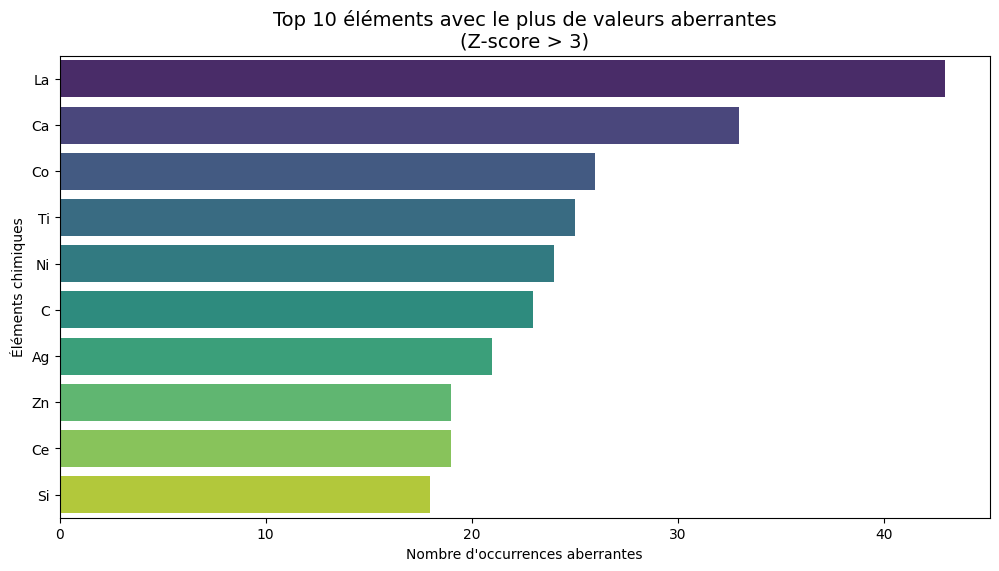

In [24]:
plt.figure(figsize=(12, 6))
top_outliers = outliers_count[outliers_count > 0].sort_values(ascending=False).head(10).reset_index()
top_outliers.columns = ['element', 'count']

sns.barplot(data=top_outliers,
            x='count',
            y='element',
            hue='element',
            palette='viridis',
            legend=False)

plt.title('Top 10 éléments avec le plus de valeurs aberrantes\n(Z-score > 3)', fontsize=14)
plt.xlabel('Nombre d\'occurrences aberrantes')
plt.ylabel('Éléments chimiques')
plt.show()

In [25]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Copie du dataset original
df_cleaned = data.copy()

# Colonnes à traiter
element_columns = [col for col in data.columns]

# Remplacement des outliers par la médiane de façon itérative
max_iterations = 10
for iteration in range(max_iterations):
    z_scores = df_cleaned[element_columns].apply(zscore)
    outliers_mask = np.abs(z_scores) > 3
    if not outliers_mask.values.any():
        print(f"Plus d'outliers après {iteration} itération(s).")
        break
    for col in element_columns:
        median = df_cleaned[col].median()
        df_cleaned.loc[outliers_mask[col], col] = median
else:
    print(" : il reste potentiellement des outliers après 10 itérations.")

# Vérification finale
final_z_scores = df_cleaned[element_columns].apply(zscore)
remaining_outliers = (np.abs(final_z_scores) > 3).sum()
print("\nNombre d'outliers restants par colonne (doit être 0):")
print(remaining_outliers[remaining_outliers > 0])


Plus d'outliers après 9 itération(s).

Nombre d'outliers restants par colonne (doit être 0):
Series([], dtype: int64)


On va visualiser tout cela :

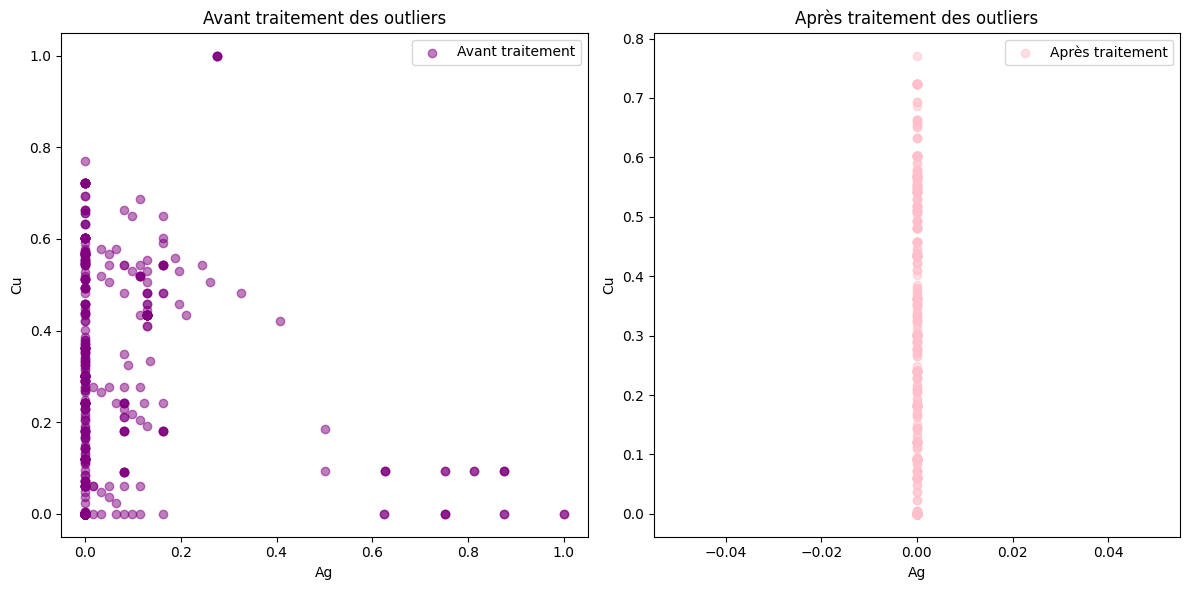

In [26]:
import matplotlib.pyplot as plt

# Choisir deux colonnes parmi les éléments chimiques pour le nuage de points
# Par exemple on va choisir 'Ag' et 'Cu'
columns_to_plot = ['Ag', 'Cu']

plt.figure(figsize=(12, 6))

# Avant traitement des outliers
plt.subplot(1, 2, 1)
plt.scatter(data['Ag'], data['Cu'], alpha=0.5, color='purple', label='Avant traitement')
plt.title('Avant traitement des outliers')
plt.xlabel('Ag')
plt.ylabel('Cu')
plt.legend()

# Après traitement des outliers
plt.subplot(1, 2, 2)
plt.scatter(df_cleaned['Ag'], df_cleaned['Cu'], alpha=0.5, color='pink', label='Après traitement')
plt.title('Après traitement des outliers')
plt.xlabel('Ag')
plt.ylabel('Cu')
plt.legend()

# Affichage
plt.tight_layout()
plt.show()


**#  Explication :**
  avant : Le nuage de points bleu montre la relation entre les colonnes 'Ag' et 'Cu' avant traitement. Les outliers apparaîtront comme des points très éloignés des autres données.
  
 apres :: Le nuage de points orange montre la relation entre les mêmes colonnes après que les outliers aient été supprimés ou remplacés par la médiane. Les points sont plus proches du centre du nuage, et les outliers ne sont visibles.


In [27]:
# Créer une copie temporaire de df_cleaned
df_temp = df_cleaned.copy()

# Supprimer les colonnes constantes pour le calcul de la corrélation
df_temp = df_temp.loc[:, df_temp.nunique() > 1]

# Calcul de la matrice de corrélation sur le DataFrame sans colonnes constantes
corr_matrix = df_temp.corr()


Passons au matrices de correlation :

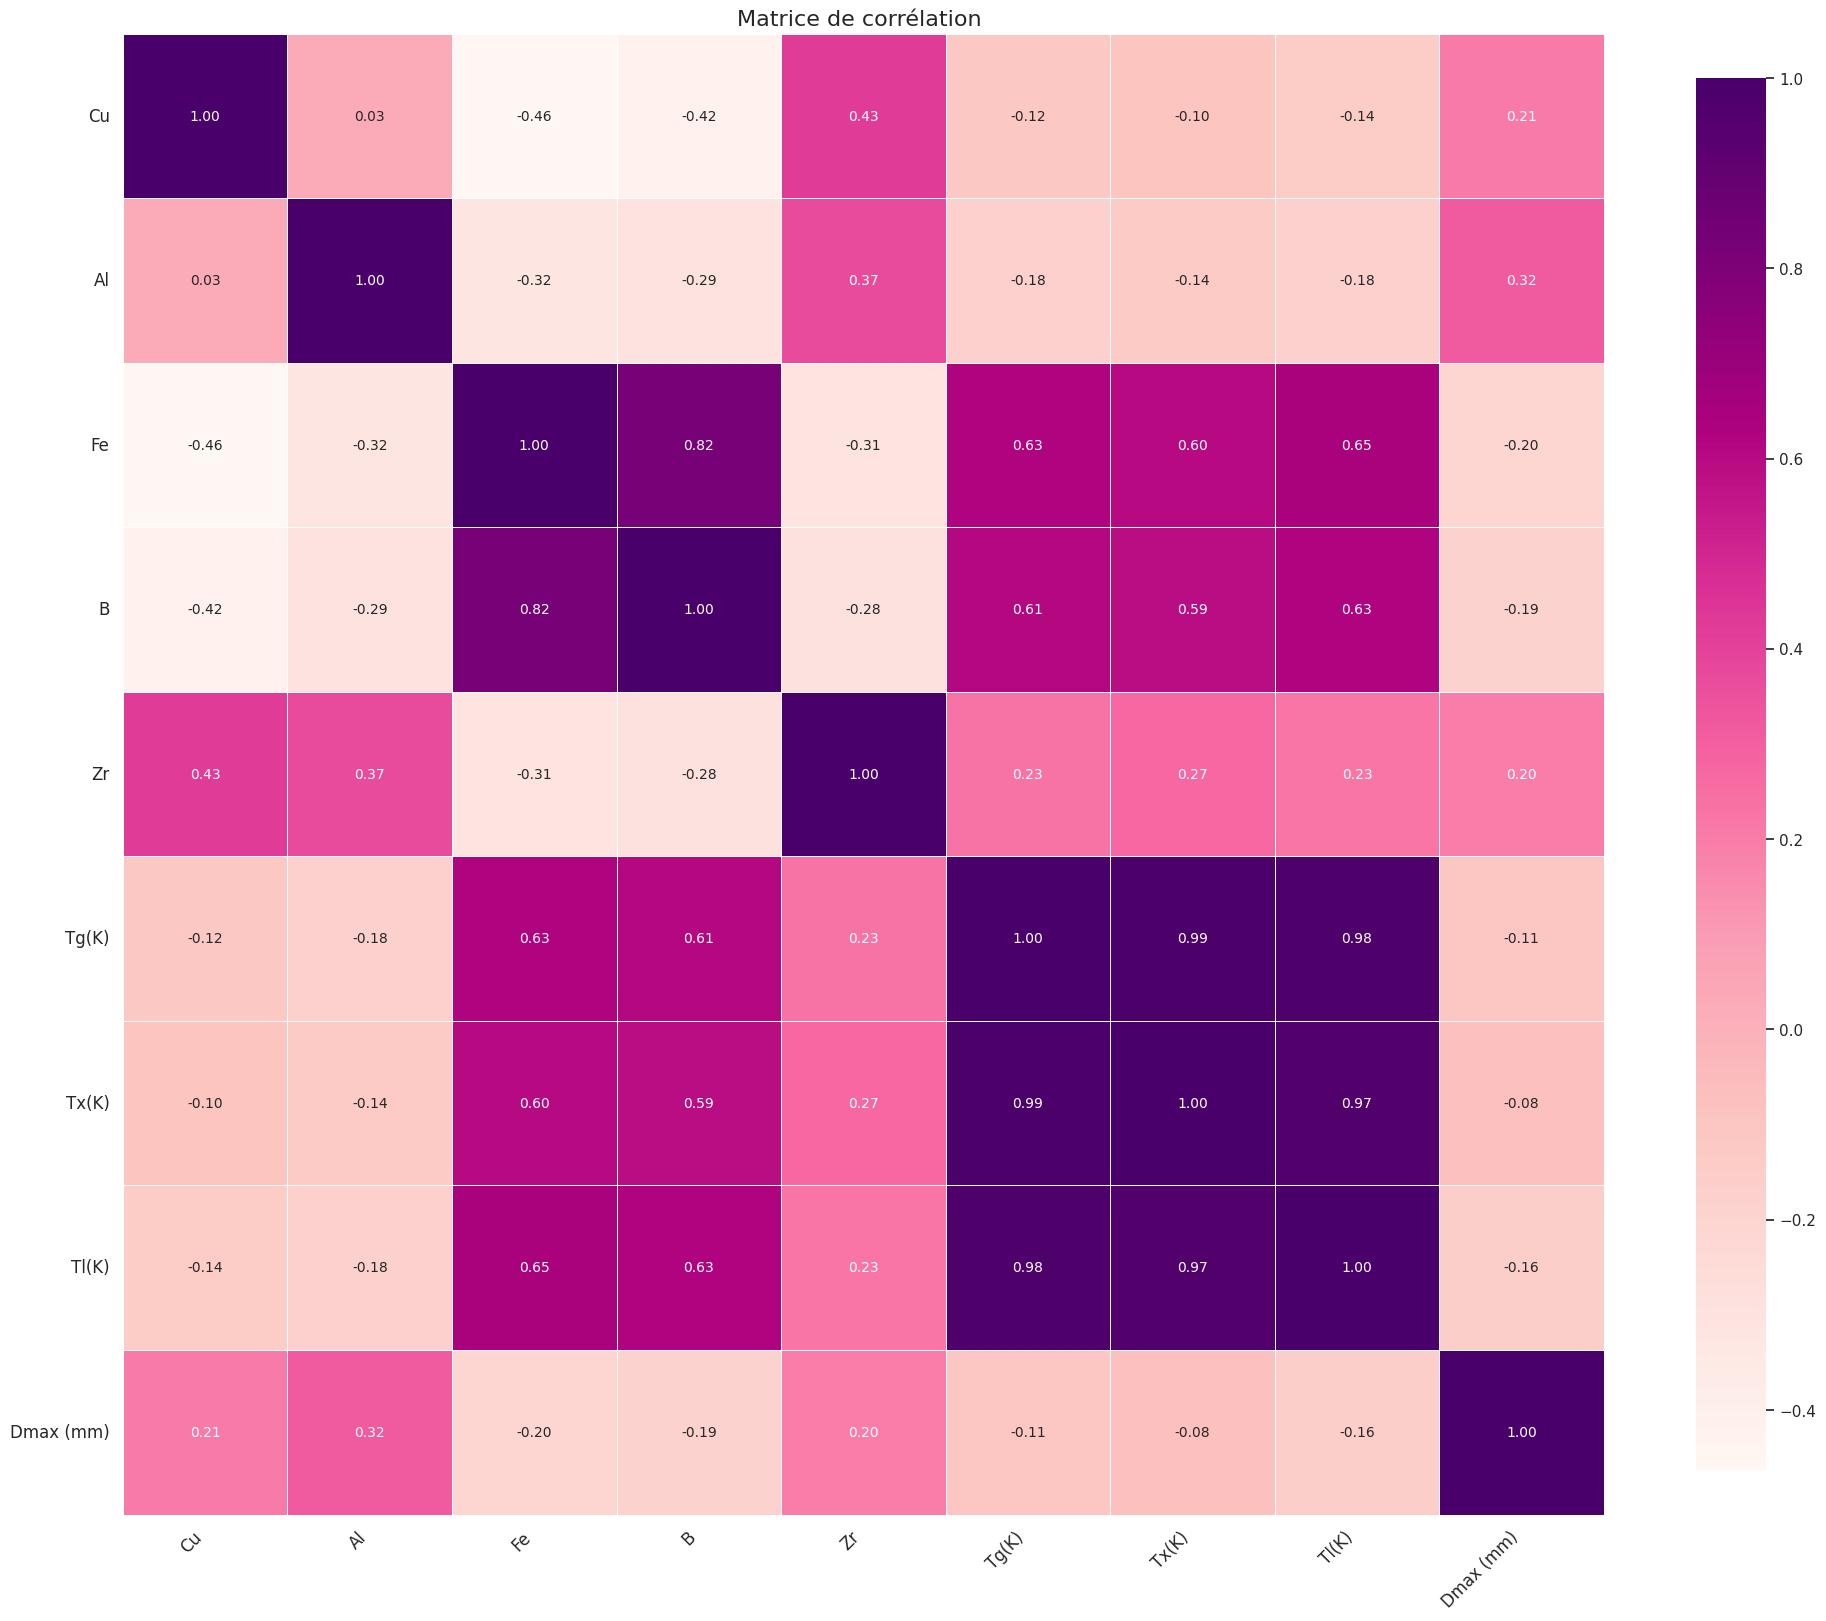

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df_temp.select_dtypes(include=['float64', 'int64']).columns

# Calcul de la matrice de corrélation sur les colonnes normalisées
corr_matrix = df_temp[numeric_cols].corr()


plt.figure(figsize=(20, 18))
sns.set(style='white')

heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='RdPu',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 10}
)

# Rotation des labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title("Matrice de corrélation ", fontsize=16)
plt.tight_layout()
plt.show()


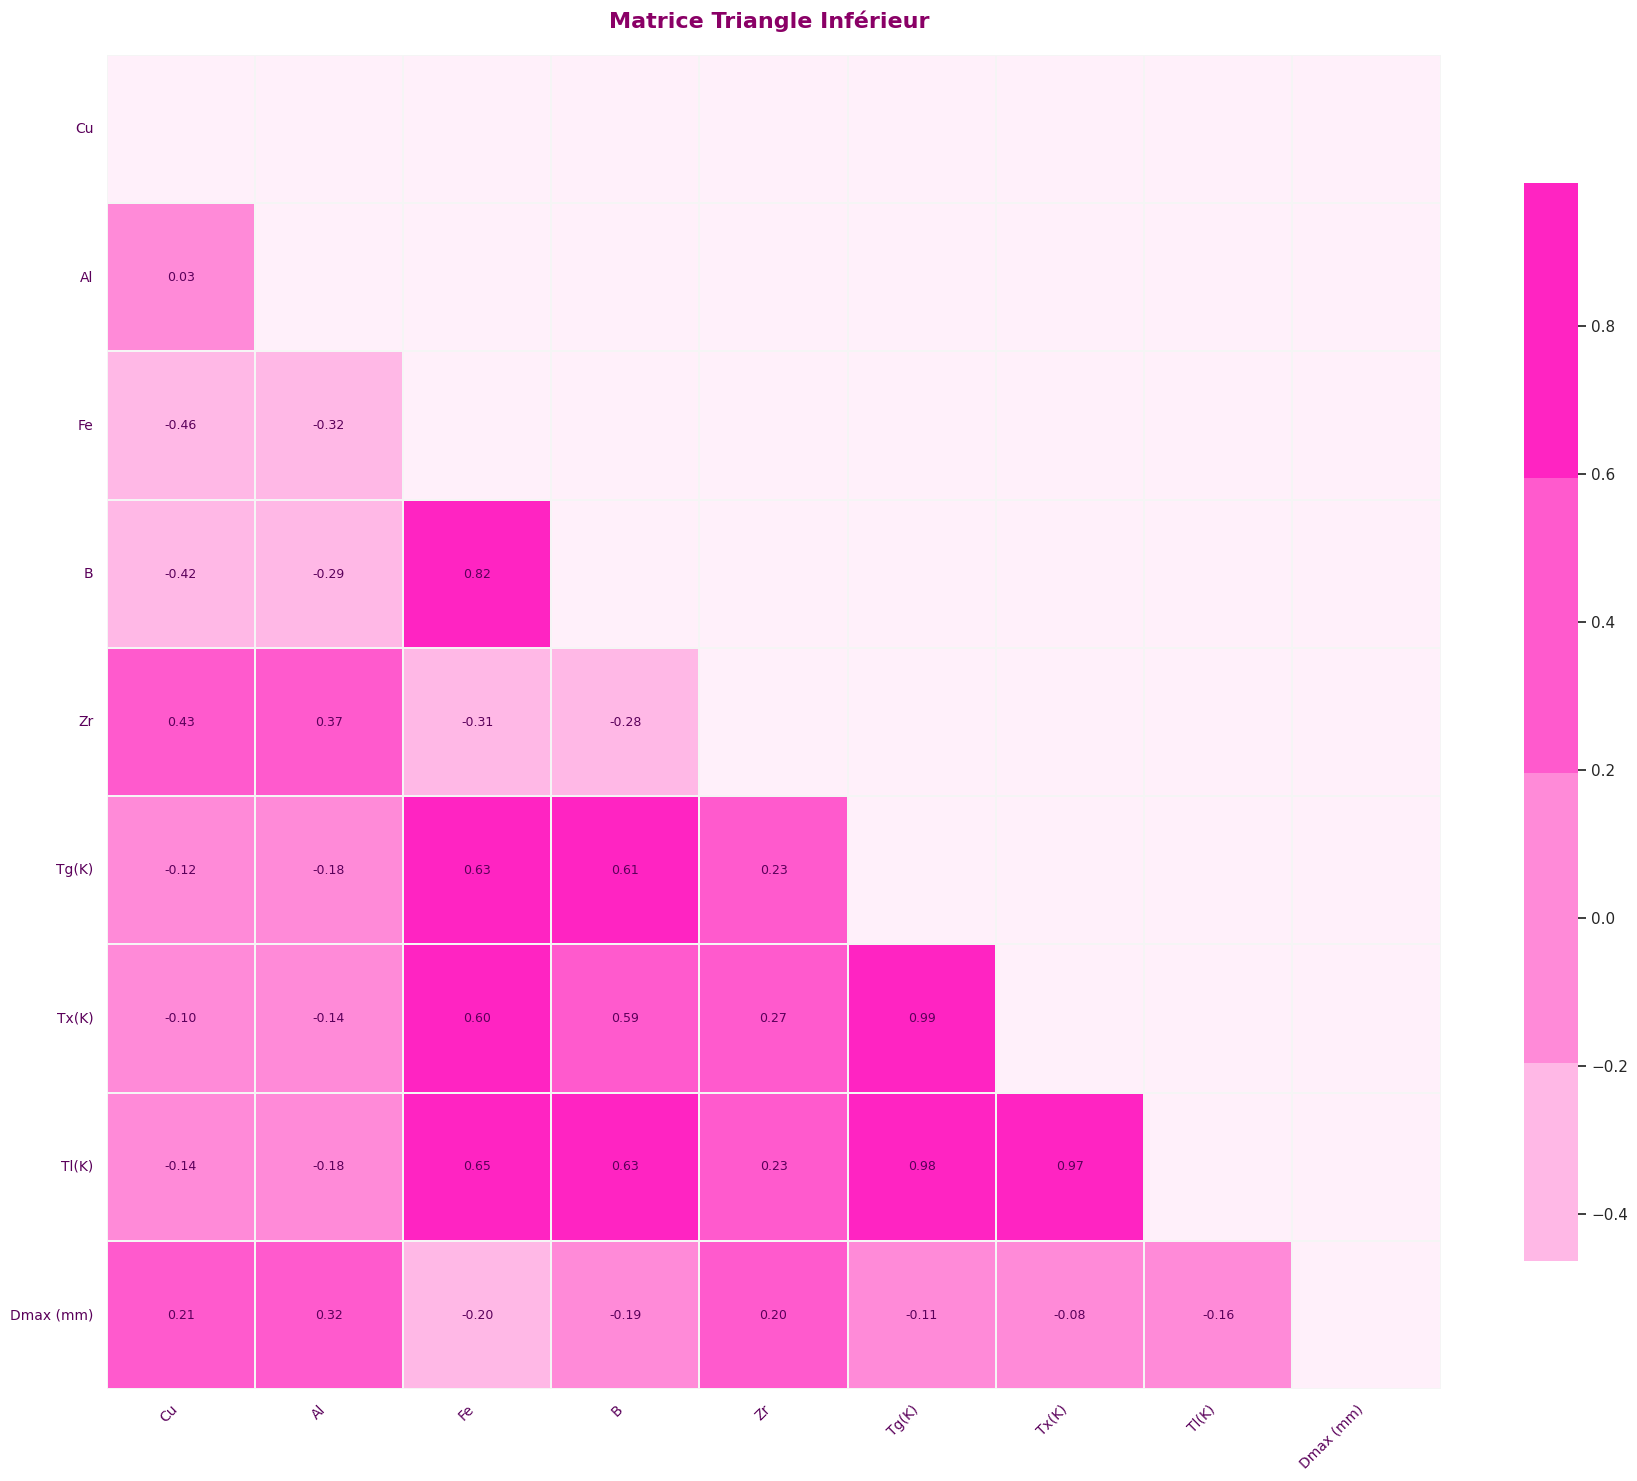

In [29]:
#matrice Triangle Inférieur
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice
corr_matrix = df_temp[numeric_cols].corr()

pink_palette = ["#FFD6F5", "#FFB8E6", "#FF8AD8", "#FF5ACD", "#FF24C2"]

plt.figure(figsize=(18, 16))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            cmap=pink_palette,
            center=0,
            fmt=".2f",
            annot_kws={"size": 9, "color": "#5A005A"},  # Purple annotations
            linewidths=0.3,
            linecolor="#F5F5F5",  # Light gray borders
            square=True,
            cbar_kws={"shrink": 0.7})


plt.xticks(rotation=45, ha='right', fontsize=10, color="#5A005A")
plt.yticks(rotation=0, fontsize=10, color="#5A005A")
plt.title("Matrice Triangle Inférieur ", pad=20, fontsize=16, color="#8A0066", weight='bold')


plt.gca().set_facecolor("#FFF0FA")
plt.grid(visible=False)

plt.tight_layout()
plt.show()

In [30]:
# Détection des paires fortement corrélées
threshold = 0.9
corr_matrix = df_temp[numeric_cols].corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print("Variables très corrélées  :")
for column in to_drop:
    corr_with = upper[upper[column] > threshold][column]
    print(f"{column} est fortement corrélé avec {list(corr_with.index)} (corr > 0.9)")


Variables très corrélées  :
Tx(K) est fortement corrélé avec ['Tg(K)'] (corr > 0.9)
Tl(K) est fortement corrélé avec ['Tg(K)', 'Tx(K)'] (corr > 0.9)


Résultats observés :
Tx(K) est très fortement corrélée avec Tg(K) (corrélation > 0.90).

Tl(K) est très fortement corrélée à la fois avec Tx(K) et Tg(K) (corrélation > 0.90 également).
Ces fortes corrélations indiquent que ces variables véhiculent de l’information redondante.

In [31]:
df_cleaned.columns

Index(['Ag', 'Ca', 'Mg', 'Cu', 'Au', 'Si', 'Pd', 'Nd', 'Al', 'Ni', 'Fe', 'Zn',
       'Ce', 'Ga', 'Nb', 'La', 'Co', 'B', 'Ta', 'Cr', 'C', 'Mo', 'Zr', 'Ti',
       'Hf', 'In', 'Y', 'Sn', 'P', 'W', 'Er', 'Mn', 'Dy', 'Tb', 'Gd', 'Tm',
       'Ho', 'Pr', 'S', 'Be', 'Sc', 'Sm', 'V', 'Tg(K)', 'Tx(K)', 'Tl(K)',
       'Dmax (mm)'],
      dtype='object')

Nous allons retirer l'attribut Tg(K).

In [32]:
df_cleanedd=df_cleaned.drop(columns=['Tg(K)'])

In [33]:
df_cleanedd.columns


Index(['Ag', 'Ca', 'Mg', 'Cu', 'Au', 'Si', 'Pd', 'Nd', 'Al', 'Ni', 'Fe', 'Zn',
       'Ce', 'Ga', 'Nb', 'La', 'Co', 'B', 'Ta', 'Cr', 'C', 'Mo', 'Zr', 'Ti',
       'Hf', 'In', 'Y', 'Sn', 'P', 'W', 'Er', 'Mn', 'Dy', 'Tb', 'Gd', 'Tm',
       'Ho', 'Pr', 'S', 'Be', 'Sc', 'Sm', 'V', 'Tx(K)', 'Tl(K)', 'Dmax (mm)'],
      dtype='object')

# K means sans D max:

In [34]:
df_cleanedd.columns

Index(['Ag', 'Ca', 'Mg', 'Cu', 'Au', 'Si', 'Pd', 'Nd', 'Al', 'Ni', 'Fe', 'Zn',
       'Ce', 'Ga', 'Nb', 'La', 'Co', 'B', 'Ta', 'Cr', 'C', 'Mo', 'Zr', 'Ti',
       'Hf', 'In', 'Y', 'Sn', 'P', 'W', 'Er', 'Mn', 'Dy', 'Tb', 'Gd', 'Tm',
       'Ho', 'Pr', 'S', 'Be', 'Sc', 'Sm', 'V', 'Tx(K)', 'Tl(K)', 'Dmax (mm)'],
      dtype='object')

On va retirer le diametre maximum ( maximum diameter )

In [35]:
df_cleaned_sansDmax=df_cleanedd.drop(columns=['Dmax (mm)'])

In [36]:
df_cleaned_sansDmax.columns

Index(['Ag', 'Ca', 'Mg', 'Cu', 'Au', 'Si', 'Pd', 'Nd', 'Al', 'Ni', 'Fe', 'Zn',
       'Ce', 'Ga', 'Nb', 'La', 'Co', 'B', 'Ta', 'Cr', 'C', 'Mo', 'Zr', 'Ti',
       'Hf', 'In', 'Y', 'Sn', 'P', 'W', 'Er', 'Mn', 'Dy', 'Tb', 'Gd', 'Tm',
       'Ho', 'Pr', 'S', 'Be', 'Sc', 'Sm', 'V', 'Tx(K)', 'Tl(K)'],
      dtype='object')

On va utiliser la méthode du coude pour connaitre le nombre de clusters idéal.

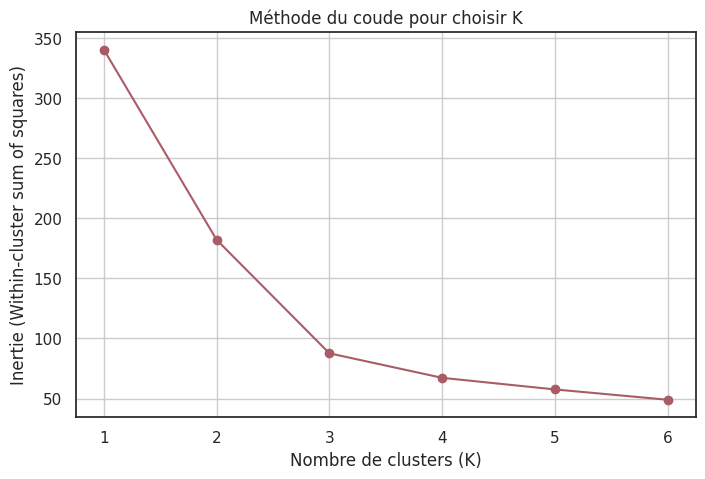

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


inertia = []
K_range = range(1, 7)

for k in K_range:
    kmeans = KMeans(n_clusters=k, max_iter=500, n_init=20, random_state=0)
    kmeans.fit(df_cleaned_sansDmax)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', color='#A95C68')
plt.title("Méthode du coude pour choisir K")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie (Within-cluster sum of squares)")
plt.grid(True)
plt.show()


K=3 optimal

In [38]:
df_cleaned_sansDmax.columns

Index(['Ag', 'Ca', 'Mg', 'Cu', 'Au', 'Si', 'Pd', 'Nd', 'Al', 'Ni', 'Fe', 'Zn',
       'Ce', 'Ga', 'Nb', 'La', 'Co', 'B', 'Ta', 'Cr', 'C', 'Mo', 'Zr', 'Ti',
       'Hf', 'In', 'Y', 'Sn', 'P', 'W', 'Er', 'Mn', 'Dy', 'Tb', 'Gd', 'Tm',
       'Ho', 'Pr', 'S', 'Be', 'Sc', 'Sm', 'V', 'Tx(K)', 'Tl(K)'],
      dtype='object')

Faisons maintenant notre clustering avec nb clusters = 3

In [39]:
from sklearn.cluster import KMeans



kmeans = KMeans(n_clusters=3, max_iter=500, n_init=20, random_state=0)
kmeans.fit(df_cleaned_sansDmax)

df_cleaned_clusters = df_cleanedd.copy()

df_cleaned_clusters['Cluster'] = kmeans.labels_

Visualisons nos clusters

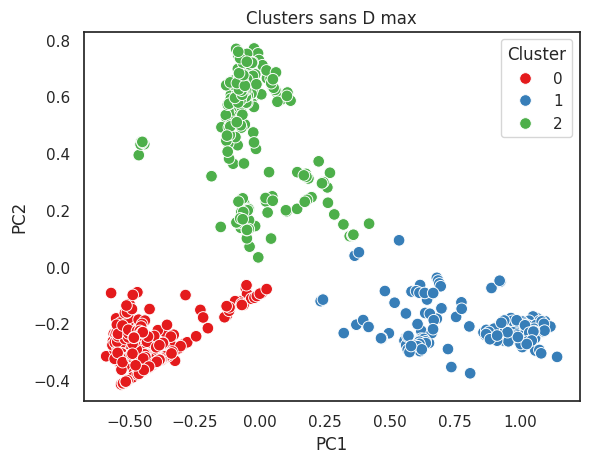

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_cleaned_sansDmax)

sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=kmeans.labels_,
    palette='Set1',
    s=70
)

plt.title('Clusters sans D max')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()



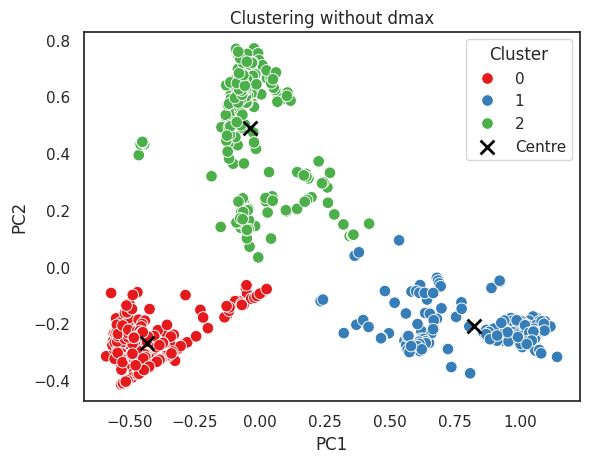

In [41]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_cleaned_sansDmax)

# Calcul des centres des clusters dans l’espace PCA
centers_pca = np.array([
    pca_result[kmeans.labels_ == i].mean(axis=0)
    for i in range(kmeans.n_clusters)
])

# Scatter plot
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=kmeans.labels_,
    palette='Set1',
    s=70
)


plt.scatter(
    centers_pca[:, 0],
    centers_pca[:, 1],
    c='black',
    marker='x',
    s=100,
    linewidths=2,
    label='Centre'
)

plt.title('Clustering without dmax')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()



-Evaluation de notre clustering

In [42]:
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_score
pca = PCA(n_components=0.80)
reduced_data_withoutDmax = pca.fit_transform(df_cleaned_sansDmax)

print ("K-means clustering without dMax scores: ")
print("------------------------------------")
score = silhouette_score(reduced_data_withoutDmax, kmeans.labels_)
print(f"Silhouette Score : {score:.3f}")

dbi = davies_bouldin_score(reduced_data_withoutDmax, df_cleaned_clusters['Cluster'])
print(f"Davies-Bouldin Index : {dbi:.3f}")

chi = calinski_harabasz_score(reduced_data_withoutDmax, df_cleaned_clusters['Cluster'])
print(f"Calinski_harabasz score : {chi:.3f}")

K-means clustering without dMax scores: 
------------------------------------
Silhouette Score : 0.739
Davies-Bouldin Index : 0.376
Calinski_harabasz score : 3118.523


In [43]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

chi = calinski_harabasz_score(reduced_data_withoutDmax, df_cleaned_clusters['Cluster'])
print(chi)

3118.522615924228


In [44]:
# Comptage des éléments dans chaque cluster
cluster_counts = df_cleaned_clusters['Cluster'].value_counts().sort_index()

# Affichage
print("Nombre d'éléments par cluster :\n")
print(cluster_counts)


Nombre d'éléments par cluster :

Cluster
0    294
1    166
2    231
Name: count, dtype: int64


Visualisons la répartition des alliages dans nos clusters

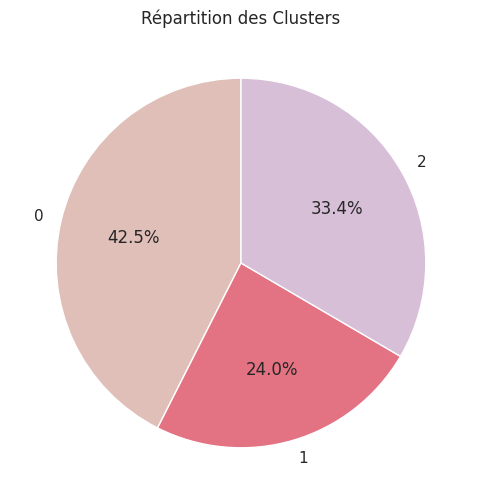

In [45]:
import matplotlib.pyplot as plt

# Graphique en camembert
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#E0BFB8','#E37383','#D8BFD8'], startangle=90, legend=False)
plt.title('Répartition des Clusters')
plt.ylabel('')  # Pour ne pas afficher l'étiquette du Y
plt.show()


**Observation:** le cluster 0 contient le plus d'alliages, presque la moitié.

  -Etude de l'impact de la valeur de Dmax sur la réparititon des alliages :

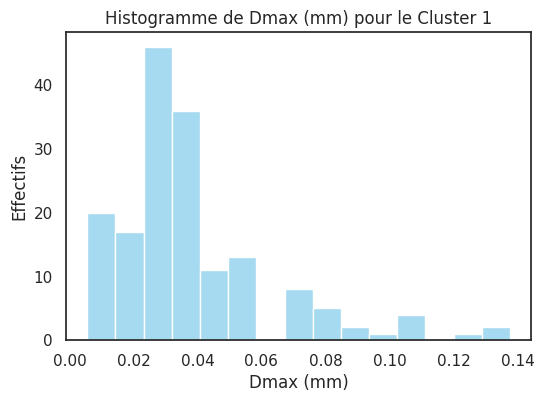

In [46]:
df_cluster_1 = df_cleaned_clusters[df_cleaned_clusters['Cluster'] == 1]

plt.figure(figsize=(6,4))
sns.histplot(df_cluster_1['Dmax (mm)'], bins=15, color='skyblue')
plt.title("Histogramme de Dmax (mm) pour le Cluster 1")
plt.xlabel("Dmax (mm)")
plt.ylabel("Effectifs")
plt.show()


La plupart des alliages du cluster 1 ont un diametre maximum compris entre 0.01 et 0.05

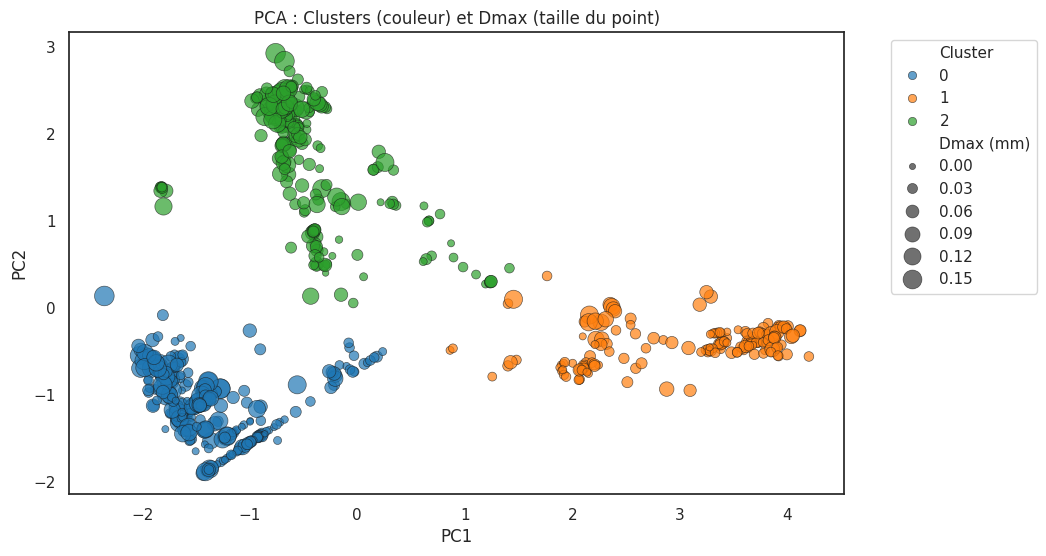

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# On enlève Dmax et Cluster pour la PCA
X = df_cleaned_clusters.drop(columns=['Dmax (mm)', 'Cluster'])
X_scaled = StandardScaler().fit_transform(X)

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_cleaned_clusters['PC1'] = X_pca[:,0]
df_cleaned_clusters['PC2'] = X_pca[:,1]

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cleaned_clusters, x='PC1', y='PC2',
                hue='Cluster', size='Dmax (mm)', sizes=(20, 200),
                palette='tab10', alpha=0.7, edgecolor='k')
plt.title("PCA : Clusters (couleur) et Dmax (taille du point)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Le graphique PCA montre que les clusters correspondent à des plages de valeurs distinctes de Dmax : le cluster 1 (orange) a les plus petites valeurs de Dmax (les points les plus petits), le cluster 0 (bleu) a des valeurs intermédiaires, et le cluster 2 (vert) montre les plus grandes valeurs de Dmax.

In [48]:
df_cleaned_clusters.groupby('Cluster')['Dmax (mm)'].mean().sort_values()

,Dmax (mm)
Cluster,
1,0.038604
0,0.054353
2,0.060745


On observe dans ce tableau que le cluster 1 a la plus petite valeur moyenne de Dmax (0,038604 mm), suivi du cluster 0 avec une valeur intermédiaire (0,054353 mm), tandis que le cluster 2 présente la plus grande valeur moyenne de Dmax (0,060745 mm). Cela confirme que les clusters se distinguent par des niveaux croissants de Dmax.

# DBSCAN

Nous allons utiliser Robust Scaler avant DBSCAN car il préserve la structure des données sans être influencé par les extrémités.

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

X_raw = df_cleaned_sansDmax.values


scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_raw)

Application de DBSCAN avec eps=1.5 et min samples=25.
Explications: eps=1.5 définit la distance maximale pour que deux points soient considérés comme voisins, et min_samples=25 indique qu’un point doit avoir au moins 25 voisins pour être considéré comme un noyau de cluster.

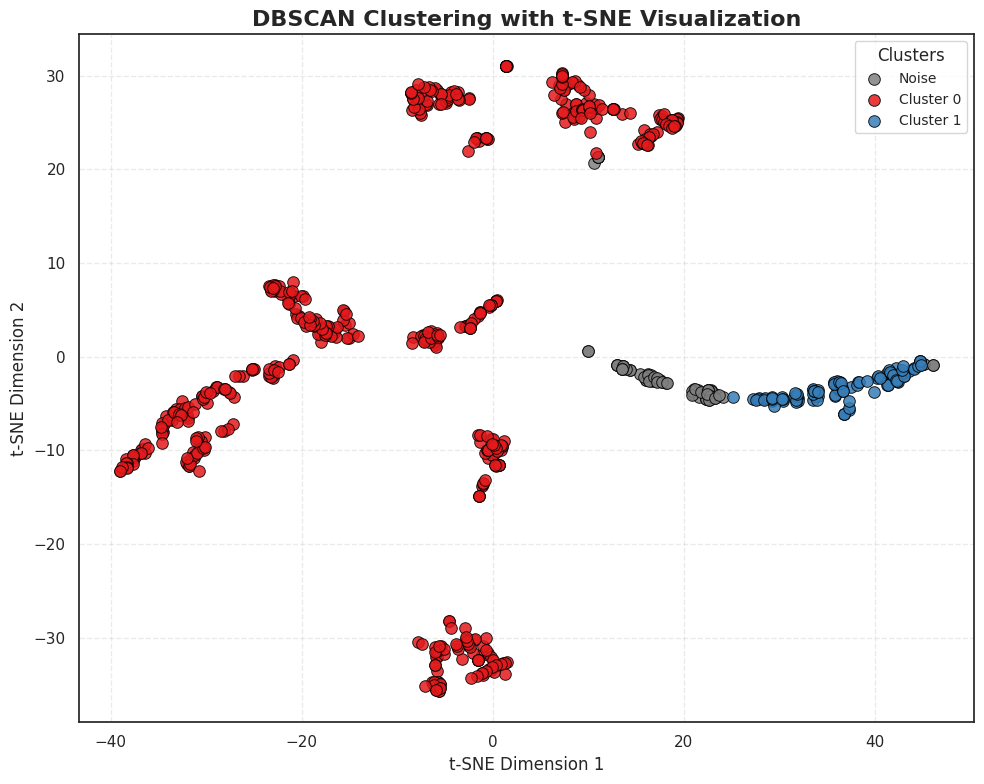

In [50]:
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE


dbscan_final = DBSCAN(eps=1.5, min_samples=25)
final_labels = dbscan_final.fit_predict(X_scaled)

X_tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000).fit_transform(X_scaled)

# Nombre de clusters (sans le bruit)
num_clusters = len(set(final_labels)) - (1 if -1 in final_labels else 0)

palette = sns.color_palette("Set1", n_colors=num_clusters)

plt.figure(figsize=(10, 8))

unique_labels = sorted(set(final_labels))

label_to_color_idx = {label: idx for idx, label in enumerate(sorted(set(final_labels) - {-1}))}


for label in unique_labels:
    color = 'gray' if label == -1 else palette[label_to_color_idx[label]]
    mask = final_labels == label
    plt.scatter(
        X_tsne[mask, 0], X_tsne[mask, 1],
        c=[color],
        s=70,
        edgecolor='black',
        linewidth=0.7,
        label=f"Cluster {label}" if label != -1 else "Noise",
        alpha=0.85
    )

plt.title("DBSCAN Clustering with t-SNE Visualization", fontsize=16, fontweight='bold')
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)
plt.legend(title="Clusters", fontsize=10, title_fontsize=12, loc='best')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



PS: La visualisation t-SNE est utilisée avec DBSCAN pour réduire la dimension des données tout en préservant la structure locale, ce qui permet de mieux visualiser la séparation naturelle des clusters détectés, surtout lorsque les données ont plusieurs dimensions.

In [51]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

dbscan = DBSCAN(eps=1.5, min_samples=25)
labels = dbscan.fit_predict(X_scaled)

print("Metrics with DBSCAN")
print("-----------------------------------")

print(f"Silhouette Score  : {score:.3f}")



core_data = X_scaled[final_labels != -1]
core_labels = final_labels[final_labels != -1]
db_index = davies_bouldin_score(core_data, core_labels)
print(f"Davies-Bouldin Index : {db_index:.3f}")

n_clusters = len(set(final_labels)) - (1 if -1 in final_labels else 0)

if n_clusters > 1:
    ch_score = calinski_harabasz_score(X_scaled[final_labels != -1], final_labels[final_labels != -1])
    print(f"Calinski-Harabasz Index : {ch_score:.2f}")
else:
    print("Calinski-Harabasz non applicable : moins de 2 clusters.")

Metrics with DBSCAN
-----------------------------------
Silhouette Score  : 0.739
Davies-Bouldin Index : 0.086
Calinski-Harabasz Index : 35020.68


Ces résultats DBSCAN indiquent des clusters bien définis et compacts, avec un Silhouette Score élevé (0,739), un indice de Davies-Bouldin très faible (0,086) et un indice de Calinski-Harabasz très élevé (35020,68), ce qui traduit une excellente qualité de regroupement.

# Feature engineering

On va créer de nouvelles variables à partir des colonnes existantes

In [52]:
df_cleaned.columns

Index(['Ag', 'Ca', 'Mg', 'Cu', 'Au', 'Si', 'Pd', 'Nd', 'Al', 'Ni', 'Fe', 'Zn',
       'Ce', 'Ga', 'Nb', 'La', 'Co', 'B', 'Ta', 'Cr', 'C', 'Mo', 'Zr', 'Ti',
       'Hf', 'In', 'Y', 'Sn', 'P', 'W', 'Er', 'Mn', 'Dy', 'Tb', 'Gd', 'Tm',
       'Ho', 'Pr', 'S', 'Be', 'Sc', 'Sm', 'V', 'Tg(K)', 'Tx(K)', 'Tl(K)',
       'Dmax (mm)'],
      dtype='object')

In [53]:
df_fe=df_cleaned.copy()

Liste des éléments chimiques utilisés pour calculer les caractéristiques liées à la composition des alliages.

In [54]:
element_cols = ['Ag', 'Ca', 'Mg', 'Cu', 'Au', 'Si', 'Pd', 'Nd', 'Al', 'Ni', 'Fe', 'Zn',
                'Ce', 'Ga', 'Nb', 'La', 'Co', 'B', 'Ta', 'Cr', 'C', 'Mo', 'Zr', 'Ti',
                'Hf', 'In', 'Y', 'Sn', 'P', 'W', 'Er', 'Mn', 'Dy', 'Tb', 'Gd', 'Tm',
                'Ho', 'Pr', 'S', 'Be', 'Sc', 'Sm', 'V']


ici on a selectionné les éléments chimiques les plus fréquents ainsi que les variables thermiques clés pour l'analyse

In [55]:
elements_present = ['Cu', 'Zr', 'Al', 'Fe', 'B']

# Extraire uniquement ces colonnes + les colonnes thermiques importantes
features = elements_present + ['Tg(K)', 'Tx(K)', 'Tl(K)']

X = df_fe[features]


on a fait la création de nouvelles features pour enrichir le jeu de données :
nombre d'éléments présents, statistiques descriptives sur leurs pourcentages,
et des ratios thermiques importants pour mieux capturer la structure des alliages.

In [56]:

X = df_fe[features].copy()

# Feature engineering
X['Nb_elements'] = (X[elements_present] > 0).sum(axis=1)
X['Mean_pct'] = X[elements_present].mean(axis=1)
X['Std_pct'] = X[elements_present].std(axis=1)
X['Max_elem_pct'] = X[elements_present].max(axis=1)
X['Delta_T'] = X['Tx(K)'] - X['Tg(K)']
X['Trg'] = X['Tg(K)'] / X['Tl(K)']
X['Reduced_Tx'] = X['Tx(K)'] / X['Tl(K)']


on a utilisé la méthode du coude pour déterminer le nombre optimal de clusters en traçant l'inertie en fonction de k.

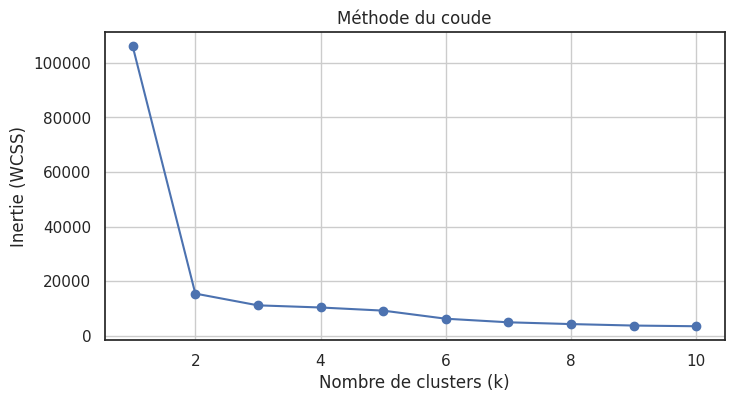

In [57]:
# Nettoyage
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()

#  Mise à l’échelle
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_clean)

#  Méthode du coude
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (WCSS)')
plt.title("Méthode du coude")
plt.grid(True)
plt.show()


Selon cette analyse, le nombre optimal de clusters serait k=2 ou k=3 on a choisi K=2

On applique l'algorithme KMeans avec 2 clusters

In [58]:

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


df_fe.loc[X_clean.index, 'Cluster'] = clusters

Réduction de dimension avec t-SNE pour visualiser les clusters en 2D.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


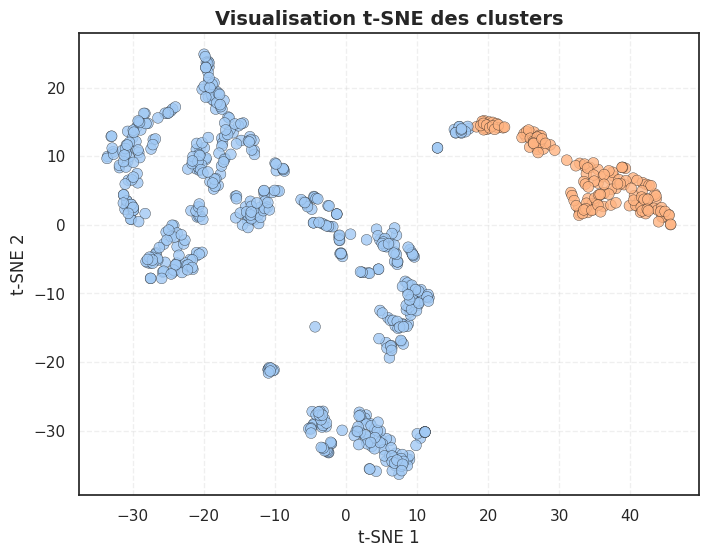

In [59]:
from sklearn.manifold import TSNE
import seaborn as sns

# t-SNE
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000).fit_transform(X_scaled)


palette = sns.color_palette("pastel", len(np.unique(clusters)))

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_tsne[:,0], X_tsne[:,1],
    c=[palette[i] for i in clusters],
    s=60, edgecolors='k', linewidths=0.3, alpha=0.8
)
plt.title('Visualisation t-SNE des clusters', fontsize=14, fontweight='bold')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


 On observe clairement 2 clusters principaux bien séparés :

- Cluster 0 (bleue) : Occupe la majeure partie de l'espace, avec une structure complexe et étendue
-Cluster 1 (orange) : Forme un groupe compact et bien délimité dans la partie droite du graphique

Cette visualisation confirme que k=2 était le choix optimal identifié par la méthode du coude. La séparation claire entre les deux groupes et leur cohésion interne valident cette décision.

In [60]:
# Évaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
print(f"Silhouette Score : {silhouette_score(X_scaled, clusters):.3f}")
print(f"Davies-Bouldin Index : {davies_bouldin_score(X_scaled, clusters):.3f}")
print(f"Calinski-Harabasz Score : {calinski_harabasz_score(X_scaled, clusters):.3f}")

Silhouette Score : 0.810
Davies-Bouldin Index : 0.267
Calinski-Harabasz Score : 4048.572


Silhouette Score = 0.810 : très bonne séparation des clusters.

Davies-Bouldin Index = 0.267 : très faible, donc faible chevauchement entre clusters.

Calinski-Harabasz Score = 4048.572 : score élevé indiquant des clusters denses et bien séparés.

# Hierchical clustering

Passons maintenant au Hierchical Clustering

In [61]:
df_cleanedd.columns

Index(['Ag', 'Ca', 'Mg', 'Cu', 'Au', 'Si', 'Pd', 'Nd', 'Al', 'Ni', 'Fe', 'Zn',
       'Ce', 'Ga', 'Nb', 'La', 'Co', 'B', 'Ta', 'Cr', 'C', 'Mo', 'Zr', 'Ti',
       'Hf', 'In', 'Y', 'Sn', 'P', 'W', 'Er', 'Mn', 'Dy', 'Tb', 'Gd', 'Tm',
       'Ho', 'Pr', 'S', 'Be', 'Sc', 'Sm', 'V', 'Tx(K)', 'Tl(K)', 'Dmax (mm)'],
      dtype='object')

Faisons d'abord une copie du dataset avant d'appliquer notre clustering hiérarchique

In [62]:
df_hierarchical=df_cleanedd.copy()

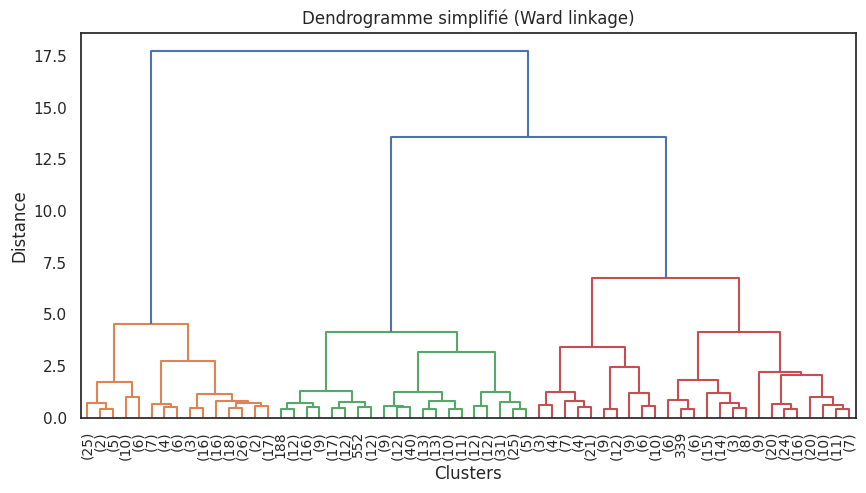

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(df_hierarchical, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked,
           truncate_mode='lastp',
           p=60,
           show_contracted=True,
           leaf_font_size=10.)
plt.title('Dendrogramme simplifié (Ward linkage)')
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.show()


Ce dendrogramme révèle une structure hiérarchique claire avec plusieurs groupes distincts, notamment un grand cluster dominant (en bleu) qui se sépare nettement des autres à une distance d'environ 17.5. La présence de sous-groupes bien définis (orange, vert, rouge) suggère une segmentation naturelle des données avec des niveaux de similarité variables entre les observations.

In [64]:
df_hierarchical.columns

Index(['Ag', 'Ca', 'Mg', 'Cu', 'Au', 'Si', 'Pd', 'Nd', 'Al', 'Ni', 'Fe', 'Zn',
       'Ce', 'Ga', 'Nb', 'La', 'Co', 'B', 'Ta', 'Cr', 'C', 'Mo', 'Zr', 'Ti',
       'Hf', 'In', 'Y', 'Sn', 'P', 'W', 'Er', 'Mn', 'Dy', 'Tb', 'Gd', 'Tm',
       'Ho', 'Pr', 'S', 'Be', 'Sc', 'Sm', 'V', 'Tx(K)', 'Tl(K)', 'Dmax (mm)'],
      dtype='object')

In [65]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hierarchical = clustering.fit_predict(df_hierarchical)

Le linkage Ward minimise la variance intra-cluster à chaque fusion, créant des clusters compacts et équilibrés en taille.

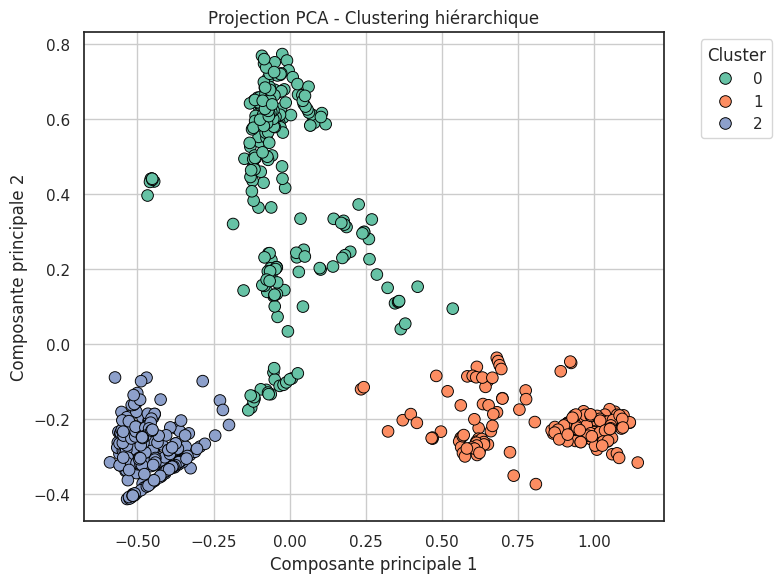

In [66]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA sur les données standardisées
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_hierarchical)

# Affichage
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=labels_hierarchical,
    palette='Set2',
    s=70,

    edgecolor='black'
)

plt.title("Projection PCA - Clustering hiérarchique")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


Cette projection PCA révèle trois clusters hiérarchiques plutot bien séparés dans l'espace bidimensionnel : le cluster bleu (en bas à gauche), le cluster vert (partie centrale-haute), et le cluster orange (à droite), démontrant l'efficacité du clustering hiérarchique avec une séparation claire entre les groupes selon les deux premières composantes principales.

In [67]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, fcluster

# Étape 1 : Réduction avec PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_hierarchical)

# Étape 2 : Clustering hiérarchique (sur données PCA)
linked = linkage(data_pca, method='ward')
k = 3
labels_pca = fcluster(linked, k, criterion='maxclust')

# Étape 3 : Scores d’évaluation
silhouette = silhouette_score(data_pca, labels_pca)
davies = davies_bouldin_score(data_pca, labels_pca)
calinski = calinski_harabasz_score(data_pca, labels_pca)

print("Metrics using Hierarchical clustering")
print("----------------------------------------------")

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {davies:.4f}")
print(f"Calinski-Harabasz Score: {calinski:.4f}")


Metrics using Hierarchical clustering
----------------------------------------------
Silhouette Score: 0.7084
Davies-Bouldin Index: 0.4341
Calinski-Harabasz Score: 2524.1165


Silhouette Score: 0.7084 - très bonne qualité de clustering avec des clusters bien définis.

Davies-Bouldin Index: 0.4341 - séparation correcte mais moins optimale qu'avec DBSCAN.

Calinski-Harabasz Score: 2524.12 - bonne compacité intra-cluster, mais inférieure aux performances DBSCAN.